In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset3_pd.csv")
datadata = pd.read_csv("dataset3_pdpd.csv")


datadata

,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%)
0,53,208,87,36,44,0,21.9,97
1,59,62,93,36,50,113,22.3,100
2,60,61,93,36,56,152,22.8,100
3,58,60,91,36,51,141,23.3,100
4,57,61,91,36,48,123,23.6,99
...,...,...,...,...,...,...,...,...
407,39,42,42,36,44,0,14.5,93
408,39,42,42,36,44,0,13.9,99
409,39,42,42,36,44,0,14.4,100
410,39,42,42,36,44,0,14.6,98


In [3]:
x = datadata.values.reshape(-1, 8)
y = data.y.values.reshape(-1, 1).ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = False)

In [40]:
SupportVectorRegModel = SVR(kernel='linear', C=100, gamma='auto', epsilon=.001)
SupportVectorRegModel.fit(x_train, y_train)

SVR(C=100, epsilon=0.001, gamma='auto', kernel='linear')

In [41]:
y_pred = SupportVectorRegModel.predict(x_test)
y_pred

array([ 6.18852318e-01,  1.18988306e-01, -4.12863759e-02, -1.28305839e-01,
       -1.81450556e-01, -1.75944852e-01, -2.09692420e-01, -5.05556143e-01,
        2.63675300e-01,  7.57880436e-01, -1.21685116e-01,  1.25124984e+00,
        1.57184725e-01, -9.56151211e-02, -8.73565611e-02,  2.05867131e-01,
        1.06698804e+00,  9.81295137e-01,  4.22284377e-02,  2.31624257e-02,
        3.09050762e-01,  9.03454499e-01,  8.14472654e-01,  1.53107439e-01,
        2.06096499e-01,  1.46999168e-02,  6.44136868e-03, -9.87179092e-03,
        3.72007912e-01,  9.70207916e-01,  5.73370387e-01,  2.66154790e-01,
        9.06997568e-01,  4.54897973e-01,  3.99000401e-01,  4.49812915e-02,
        3.39698812e-02,  1.36294197e-02,  2.31594478e-02,  6.64233459e-03,
        1.13663725e-03, -1.61622119e-03, -1.61622119e-03,  5.26037977e-01,
        4.64392301e+00,  3.26080332e+00, -1.29294615e+00, -2.37191580e+00,
       -5.64959333e-01, -5.67712183e-01, -2.25344040e-01, -2.19341309e-01,
       -2.27599863e-01, -

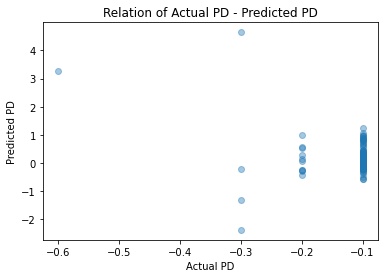

In [42]:
plt.scatter(y_test, y_pred, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Relation of Actual PD - Predicted PD')
plt.show()

In [43]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.8100945236844229